In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np


In [4]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
train = train.drop(['Unnamed: 0', 'id'], axis=1)
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
test = test.drop(['Unnamed: 0', 'id'], axis=1)
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [8]:
train.columns[train.isna().any()].tolist()

['Arrival Delay in Minutes']

In [9]:
test.columns[test.isna().any()].tolist()

['Arrival Delay in Minutes']

In [10]:
def detect_outliers(column):
    threshold = 3
    z_score = (column-column.mean())/column.std()
    return(abs(z_score)>threshold).any()

In [11]:
numeric_cols_impute = ['Arrival Delay in Minutes']
bool_train_outliers = train[numeric_cols_impute].apply(lambda x: detect_outliers(x.dropna()))
bool_test_outliers = test[numeric_cols_impute].apply(lambda x: detect_outliers(x.dropna()))


In [12]:
print(f"Train_outliers: \n {bool_train_outliers}")
print(f"Test_outliers:  \n {bool_test_outliers}")

Train_outliers: 
 Arrival Delay in Minutes    True
dtype: bool
Test_outliers:  
 Arrival Delay in Minutes    True
dtype: bool


In [13]:
train[numeric_cols_impute] = train[numeric_cols_impute].apply(lambda x: x.fillna(x.median()))
test[numeric_cols_impute]= test[numeric_cols_impute].apply(lambda x: x.fillna(x.median()))

In [14]:
numeric_columns = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
ordinal_columns = ['Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness']
nominal_columns = ['Gender','Customer Type','Type of Travel','Class']


In [15]:
len(numeric_columns)+len(ordinal_columns)+len(nominal_columns)

22

In [16]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train['satisfaction'])
y_test = label_encoder.fit_transform(test['satisfaction'])

In [17]:
ordinal_transformer = OrdinalEncoder()
nominal_transformer = OneHotEncoder(sparse_output=False, drop='first')

preprocessor= ColumnTransformer(
    transformers=[
        ('numeric','passthrough',numeric_columns),
        ('ordinal',ordinal_transformer,ordinal_columns),
        ('nominal',nominal_transformer,nominal_columns)
    ]
)
pipeline = Pipeline(steps=[('preprocessor',preprocessor)])
X_train = pipeline.fit_transform(train)
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

feature_names_adjusted=[name.split('__',1)[-1] for name in feature_names]

X_train = pd.DataFrame(X_train,columns=feature_names_adjusted)
X_train.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13.0,460.0,25.0,18.0,3.0,4.0,3.0,1.0,5.0,3.0,...,3.0,3.0,4.0,5.0,5.0,1.0,0.0,1.0,0.0,1.0
1,25.0,235.0,1.0,6.0,3.0,2.0,3.0,3.0,1.0,3.0,...,5.0,2.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0
2,26.0,1142.0,0.0,0.0,2.0,2.0,2.0,2.0,5.0,5.0,...,3.0,3.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0
3,25.0,562.0,11.0,9.0,2.0,5.0,5.0,5.0,2.0,2.0,...,5.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
4,61.0,214.0,0.0,0.0,3.0,3.0,3.0,3.0,4.0,5.0,...,4.0,3.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0


In [18]:
scaler = StandardScaler()
X_train_numeric_scaled= scaler.fit_transform(X_train[numeric_columns])
X_train_scaled = pd.DataFrame(X_train_numeric_scaled, columns = numeric_columns)
X_train_scaled = pd.concat([X_train_scaled,X_train.drop(numeric_columns, axis=1)],axis=1)
X_train_scaled.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,-1.745279,-0.731539,0.266393,0.074169,3.0,4.0,3.0,1.0,5.0,3.0,...,3.0,3.0,4.0,5.0,5.0,1.0,0.0,1.0,0.0,1.0
1,-0.951360,-0.957184,-0.361375,-0.236313,3.0,2.0,3.0,3.0,1.0,3.0,...,5.0,2.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0
2,-0.885200,-0.047584,-0.387532,-0.391554,2.0,2.0,2.0,2.0,5.0,5.0,...,3.0,3.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0
3,-0.951360,-0.629246,-0.099805,-0.158692,2.0,5.0,5.0,5.0,2.0,2.0,...,5.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
4,1.430397,-0.978244,-0.387532,-0.391554,3.0,3.0,3.0,3.0,4.0,5.0,...,4.0,3.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0


In [19]:
X_test = pipeline.fit_transform(test)
X_test = pd.DataFrame(X_test,columns=feature_names_adjusted )
X_test.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,52.0,160.0,50.0,44.0,5.0,4.0,3.0,3.0,3.0,4.0,...,5.0,4.0,1.0,5.0,5.0,0.0,0.0,0.0,1.0,0.0
1,36.0,2863.0,0.0,0.0,1.0,1.0,3.0,0.0,5.0,4.0,...,4.0,3.0,2.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0
2,20.0,192.0,0.0,0.0,2.0,0.0,2.0,3.0,2.0,2.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0
3,44.0,3377.0,0.0,6.0,0.0,0.0,0.0,1.0,3.0,4.0,...,1.0,0.0,2.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0
4,49.0,1182.0,0.0,20.0,2.0,3.0,4.0,2.0,4.0,1.0,...,2.0,1.0,3.0,2.0,4.0,0.0,0.0,0.0,1.0,0.0


In [20]:
X_test_numeric_scaled= scaler.fit_transform(X_test[numeric_columns])
X_test_scaled = pd.DataFrame(X_test_numeric_scaled, columns = numeric_columns)
X_test_scaled = pd.concat([X_test_scaled,X_test.drop(numeric_columns, axis=1)],axis=1)
X_test_scaled.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0.817887,-1.035171,0.953810,0.782208,5.0,4.0,3.0,3.0,3.0,4.0,...,5.0,4.0,1.0,5.0,5.0,0.0,0.0,0.0,1.0,0.0
1,-0.239238,1.671443,-0.382286,-0.392188,1.0,1.0,3.0,0.0,5.0,4.0,...,4.0,3.0,2.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0
2,-1.296363,-1.003128,-0.382286,-0.392188,2.0,0.0,2.0,3.0,2.0,2.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0
3,0.289325,2.186131,-0.382286,-0.232043,0.0,0.0,0.0,1.0,3.0,4.0,...,1.0,0.0,2.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0
4,0.619676,-0.011804,-0.382286,0.141628,2.0,3.0,4.0,2.0,4.0,1.0,...,2.0,1.0,3.0,2.0,4.0,0.0,0.0,0.0,1.0,0.0


In [46]:
len(X_test.columns)

23

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from numpy import interp
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.metrics import classification_report


In [23]:
xgb_clf = xgb.XGBClassifier(random_state=42)
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [24]:
report_xgb = classification_report(y_test, xgb_clf.predict(X_test), target_names=np.unique(y_test).astype(str))
print("Classification Report for XGBoost:\n",report_xgb)


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     14573
           1       0.97      0.92      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [25]:
importances= xgb_clf.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = X_train.columns
df_importances = pd.DataFrame({
    'Feature':feature_names[indices],
    'Importance': importances[indices]
})

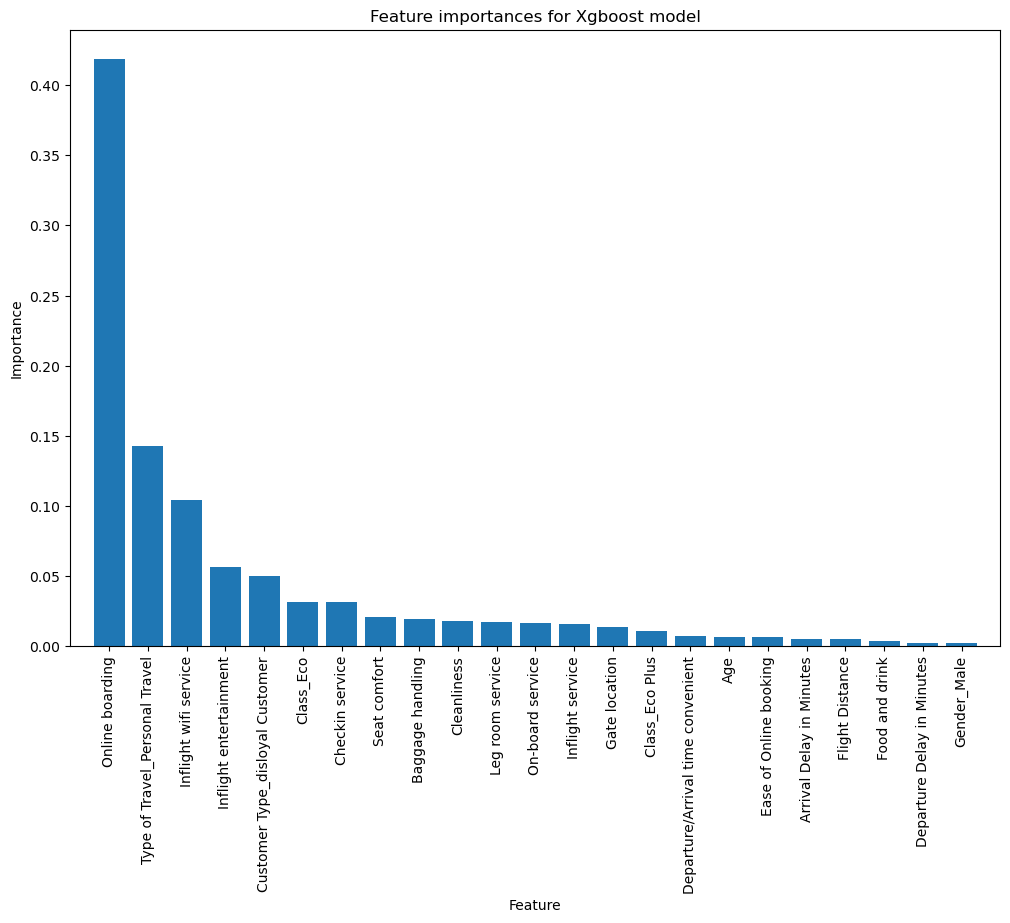

In [26]:
plt.figure(figsize=(12,8))
plt.title('Feature importances for Xgboost model')
plt.bar(range(X_train.shape[1]),importances[indices],align = 'center')
plt.xticks(range(X_train.shape[1]),feature_names[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [27]:
top_5_indices = indices[:5]
X_train_top5=X_train.iloc[:,top_5_indices]
X_test_top5=X_test.iloc[:,top_5_indices]

In [28]:
top_xgb_clf = xgb.XGBClassifier(random_state=42)
top_xgb_clf.fit(X_train_top5, y_train)

y_train_pred_top_xgb = top_xgb_clf.predict(X_train_top5)
y_test_pred_top_xgb = top_xgb_clf.predict(X_test_top5)

In [29]:
print("Classification Report for  XGBoost with top predictors:\n",classification_report(y_test, y_test_pred_top_xgb))

Classification Report for  XGBoost with top predictors:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     14573
           1       0.93      0.90      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.93     25976
weighted avg       0.93      0.93      0.93     25976



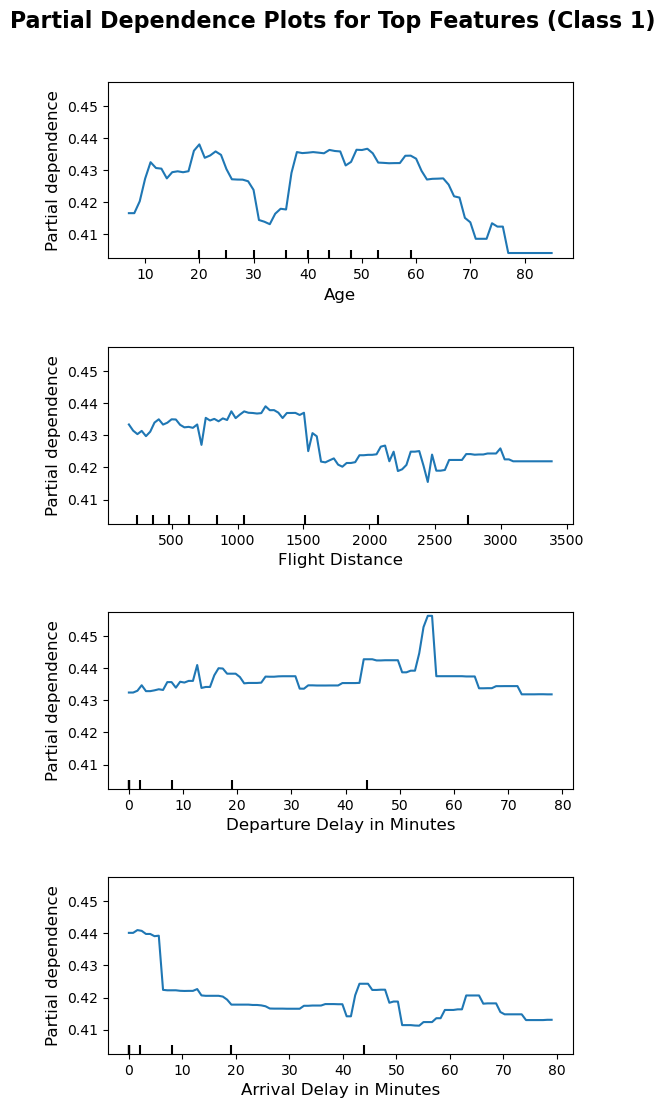

In [51]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import xgboost as xgb

# List of numerical features for PDPs
numerical_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']  # replace with your actual feature names

# Create figure and subplots for visual clarity
fig, ax = plt.subplots(len(numerical_features), 1, figsize=(6, 3 * len(numerical_features)), dpi=100)

# Plot the partial dependence plots for each feature with class 1 as the target
display = PartialDependenceDisplay.from_estimator(
    xgb_clf,                         # your trained XGBoost model
    X_train,                         # the dataset on which the model was trained
    features=numerical_features,     # features for which you want PDPs
    grid_resolution=100,             # resolution for smoother curves
    target=1,                        # target class (1 for the positive class in binary classification)
    ax=ax                            # assign subplots for better layout
)

# Set overall title and adjust subplot spacing
fig.suptitle("Partial Dependence Plots for Top Features (Class 1)", fontsize=16, weight='bold')
plt.subplots_adjust(top=0.92, hspace=0.5)

# Customize each subplot for better visuals
for ax_row in ax:
    ax_row.title.set_fontsize(14)       # Larger title font for each plot
    ax_row.title.set_fontweight('bold')
    ax_row.set_xlabel(ax_row.get_xlabel(), fontsize=12)  # Larger font for x-axis labels
    ax_row.set_ylabel(ax_row.get_ylabel(), fontsize=12)  # Larger font for y-axis labels

plt.show()